In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import itertools
from sklearn.manifold import Isomap

In [2]:
#digits data
digits = datasets.load_digits()
print(digits.images.shape)
print(digits.keys())

(1797, 8, 8)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


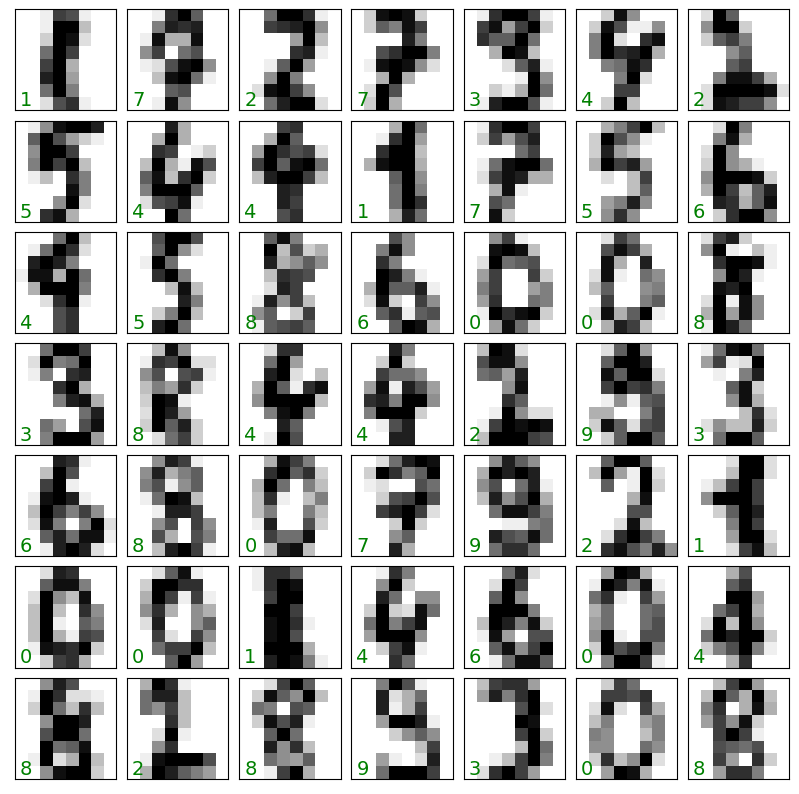

In [6]:
#example plots of some numbers
fig, axes = plt.subplots(7,7, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

np.random.seed(42)
mychoices = np.random.choice(digits.images.shape[0],100)

for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[mychoices[i]]), 
              cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]),transform=ax.transAxes, color='green', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

In [7]:
#reduction of the 64 space (8x8 pixels) = some of the pixels are withe = don't give info
n_reduction=4 #axis of reduction

embedding = sklearn.manifold.Isomap(n_components=n_reduction, n_neighbors=7) #at least 7 neighbors not to have warnings
digits_transformed = embedding.fit_transform(digits.data)
print('new shape of the data:', digits_transformed.shape)

new shape of the data: (1797, 4)


In [8]:
#number of plots is all the possible combination of the axis redution
n_plots=n_reduction*(n_reduction-1)/2
numbers = np.arange(1,n_reduction+1)

#generate all possible pairs
pairs = list(itertools.combinations(numbers, 2))
print('pairs:', pairs)

pairs: [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]


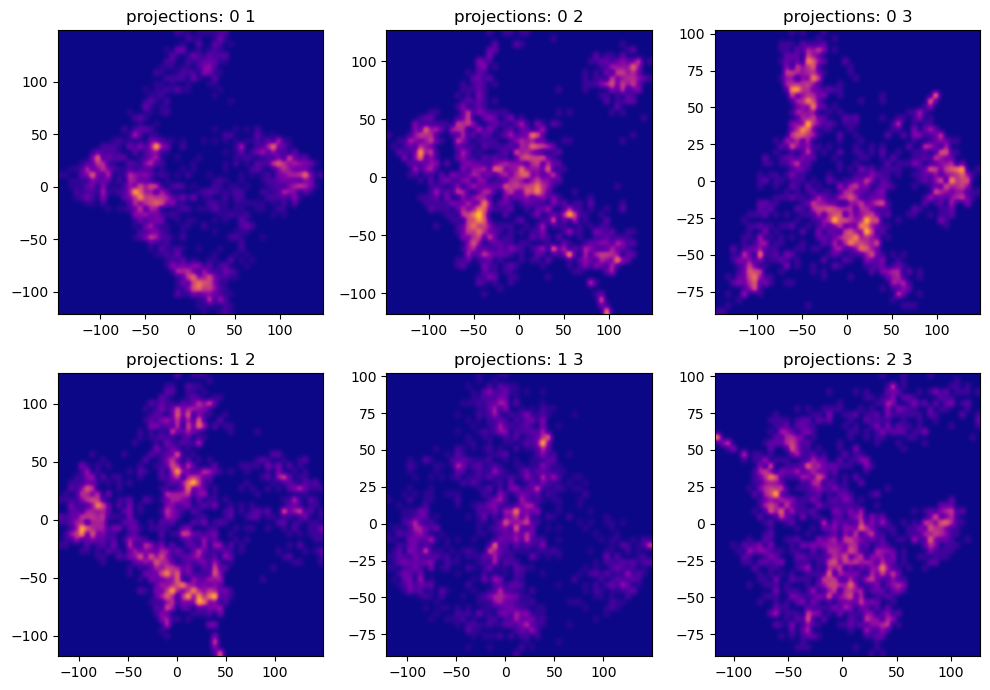

In [51]:
#plots of all the pairs
pairs=[[(0, 1), (0, 2), (0, 3)], [(1, 2), (1, 3), (2, 3)]]

fig, axes=plt.subplots(2,3,figsize=(10,7))

for i in range(0,2):
    for j in range(0, 3):
        nx=pairs[i][j][0]
        ny=pairs[i][j][1]

        H, xedges, yedges = np.histogram2d(digits_transformed[:,nx],digits_transformed[:,ny], bins=50, 
                                           range=[[digits_transformed[:,nx].min(), digits_transformed[:,nx].max()], 
                                                [digits_transformed[:,ny].min(), digits_transformed[:,ny].max()]])
        X, Y= np.meshgrid(xedges[:-1], yedges[:-1])
        axes[i][j].imshow(H.T, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], origin='lower', cmap='plasma', 
                              aspect='auto', interpolation='gaussian')
        axes[i][j].title.set_text('projections: '+str(nx)+' '+str(ny))

plt.tight_layout()

In [11]:
#reduction of the 64 space (8x8 pixels) = some of the pixels are withe = don't give info
n_reduction_2=2 #axis of reduction

embedding_2 = sklearn.manifold.Isomap(n_components=n_reduction_2, n_neighbors=7) #at least 7 neighbors not to have warnings
digits_transformed_2 = embedding_2.fit_transform(digits.data)
print('new shape of the data:', digits_transformed_2.shape)

new shape of the data: (1797, 2)


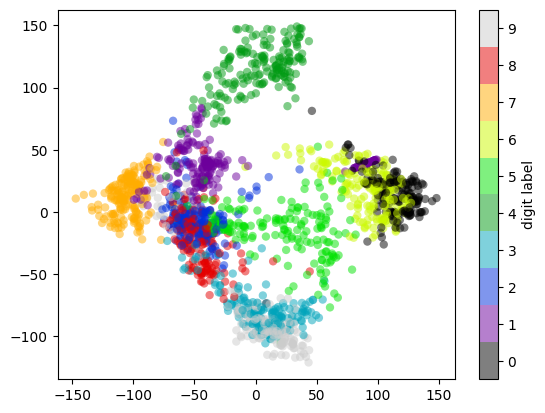

In [13]:
def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""
    base = plt.colormaps[base_cmap]
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

# Plot all of the data points in the two projected dimensions.  
# Color the points by their labels.
plt.scatter(digits_transformed_2[:,0], digits_transformed_2[:,1], c=digits.target, edgecolor='none', alpha=0.5, cmap=discrete_cmap(10,'nipy_spectral'));

plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

In [15]:
#splitting the data in train and test
digits_train, digits_test, y_train, y_test= sklearn.model_selection.train_test_split(digits.data, digits.target, test_size=0.20)

In [17]:
#use the model logistic regression
model=LogisticRegression(max_iter=2000,solver='sag') #max iter to 2000 not to have warning

#fitting the data with the model
model.fit(digits_train, y_train)

LogisticRegression(max_iter=2000, solver='sag')

In [19]:
#predict with the chosen model from train and test sample the corresponding values
y_pred=model.predict(digits_test)
y_pred_train=model.predict(digits_train)

print('accuracy metric for test:', sklearn.metrics.accuracy_score(y_test, y_pred))
print('accuracy metric for train:', sklearn.metrics.accuracy_score(y_train, y_pred_train), '\n')

#print('confusion metric for train: \n', sklearn.metrics.confusion_matrix(y_train, y_pred))
print('\nconfusion metric for test: \n', sklearn.metrics.confusion_matrix(y_test, y_pred))

accuracy metric for test: 0.9694444444444444
accuracy metric for train: 1.0 


confusion metric for test: 
 [[31  0  0  0  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  0  0  1  0]
 [ 0  1 39  0  0  0  0  0  0  0]
 [ 0  0  0 39  0  2  0  0  0  0]
 [ 0  0  0  0 32  0  0  0  0  0]
 [ 0  0  0  0  0 50  1  0  0  0]
 [ 0  0  0  0  0  0 25  0  1  0]
 [ 0  0  0  0  0  0  0 30  0  0]
 [ 0  1  0  0  0  0  0  0 37  1]
 [ 0  0  0  0  0  1  0  0  2 33]]
